
## 🧠 Descripción detallada de los algoritmos de búsqueda utilizados

### 🔍 Búsqueda en Profundidad (DFS - Depth First Search)
La búsqueda en profundidad explora cada camino desde el nodo inicial hasta el nodo final lo más profundo posible antes de retroceder (backtracking). Utiliza una **pila (LIFO)** como estructura de datos para almacenar los nodos pendientes de visitar.

- **Ventajas**:
  - Requiere menos memoria que BFS.
  - Puede encontrar soluciones rápidamente en ramas profundas.

- **Desventajas**:
  - No garantiza la solución óptima.
  - Puede caer en ciclos si no se controlan los nodos visitados.

### 🔎 Búsqueda en Amplitud (BFS - Breadth First Search)
La búsqueda en amplitud explora todos los nodos de un nivel antes de pasar al siguiente. Utiliza una **cola (FIFO)** y garantiza encontrar la solución más corta (si todos los costos son iguales).

- **Ventajas**:
  - Encuentra el camino más corto si el costo es uniforme.
  - Es completa: siempre encuentra una solución si existe.

- **Desventajas**:
  - Requiere más memoria que DFS.
  - Más lenta en espacios de búsqueda amplios.

### 🌄 Hill Climbing (Escalada de colinas)
Es un algoritmo de búsqueda **local** que en cada paso se mueve al estado vecino que tenga el mejor valor según una función heurística. No retrocede ni considera otras alternativas una vez que elige un camino.

- **Ventajas**:
  - Es rápido y consume poca memoria.
  - Sencillo de implementar.

- **Desventajas**:
  - Puede quedarse atrapado en óptimos locales.
  - No garantiza la solución global.

### 🌟 Algoritmo A* (A Star Search)
Es un algoritmo de búsqueda informada que combina el costo real desde el estado inicial con una estimación heurística del costo restante hasta el estado objetivo. Usa la función:

\[
f(n) = g(n) + h(n)
\]

Donde:
- \( g(n) \): costo desde el inicio hasta el nodo actual.
- \( h(n) \): estimación heurística del costo restante.

- **Ventajas**:
  - Encuentra el camino más corto si la heurística es admisible.
  - Es eficiente y óptimo en muchos casos prácticos.

- **Desventajas**:
  - Requiere mucha memoria.
  - Su eficiencia depende de la calidad de la heurística.

---

👉 **En este caso práctico**, A* es ideal ya que permite encontrar rutas eficientes evitando obstáculos, mientras que DFS puede ofrecer rutas válidas pero más largas o subóptimas.



# 🧠 Caso Práctico: Juego Mini Pac-Man (7x7) con DFS y A*

Este notebook simula un escenario simplificado de un juego tipo Pac-Man, donde el jugador debe encontrar la mejor ruta hacia la salida evitando obstáculos y enemigos.

## Objetivo:
Comparar los resultados entre los algoritmos:
- **DFS (Búsqueda en profundidad)**
- **A* (Búsqueda heurística óptima)**

## Mapa:
- `'A'`: posición inicial de Pac-Man
- `'S'`: salida
- `'#'`: muros
- `'F'`: enemigo (fantasma)


In [23]:

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.colors import ListedColormap


In [24]:

mapa = np.array([
    ['A', ' ', '#', ' ', 'F', '#', ' '],
    ['#', ' ', '#', ' ', '#', ' ', ' '],
    [' ', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', '#', '#', ' ', '#', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', '#', ' '],
    ['F', '#', '#', '#', ' ', '#', 'F'],
    [' ', ' ', ' ', '#', ' ', ' ', 'S'],
])


In [25]:

G = nx.Graph()
for i in range(7):
    for j in range(7):
        if mapa[i, j] != '#':
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                ni, nj = i + dx, j + dy
                if 0 <= ni < 7 and 0 <= nj < 7 and mapa[ni, nj] != '#':
                    G.add_edge((i, j), (ni, nj))


In [26]:

inicio = tuple(np.argwhere(mapa == 'A')[0])
meta = tuple(np.argwhere(mapa == 'S')[0])

def heuristic(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

camino_astar = nx.astar_path(G, inicio, meta, heuristic)
camino_dfs = list(nx.dfs_edges(G, inicio))
camino_dfs_nodos = [inicio]
for edge in camino_dfs:
    if edge[0] == camino_dfs_nodos[-1]:
        camino_dfs_nodos.append(edge[1])


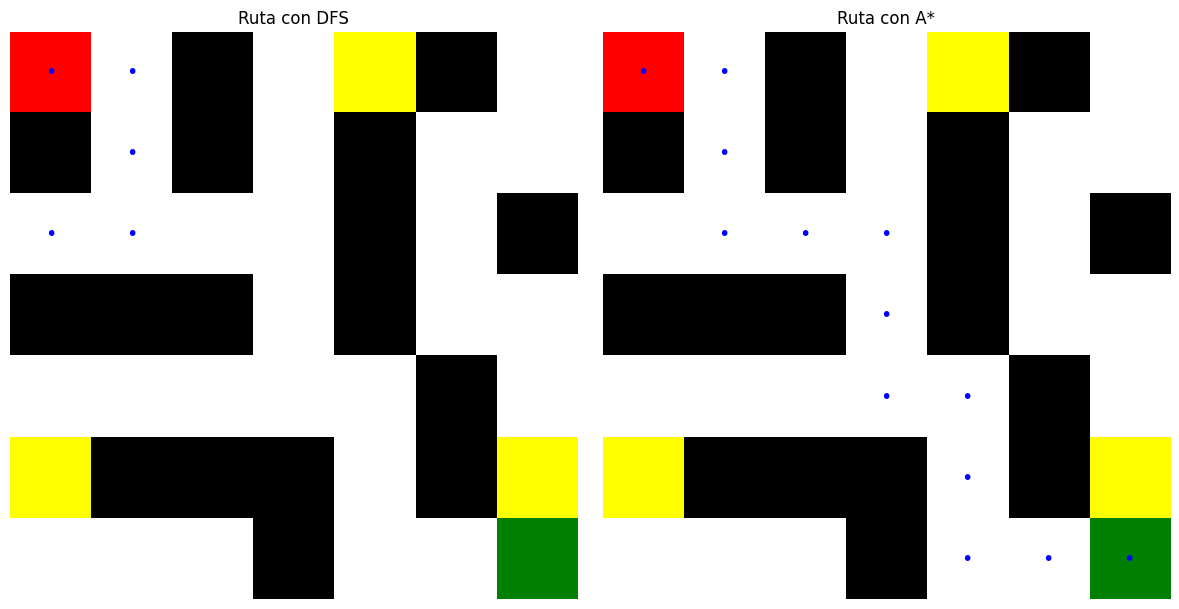

In [27]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
cmap = ListedColormap(['white', 'black', 'red', 'green', 'yellow'])

for ax, camino, titulo in zip(axs, [camino_dfs_nodos, camino_astar], ["DFS", "A*"]):
    colores = np.full(mapa.shape, 0)
    for i in range(7):
        for j in range(7):
            if mapa[i, j] == '#':
                colores[i, j] = 1
            elif mapa[i, j] == 'A':
                colores[i, j] = 2
            elif mapa[i, j] == 'S':
                colores[i, j] = 3
            elif mapa[i, j] == 'F':
                colores[i, j] = 4

    ax.imshow(colores, cmap=cmap)
    for (x, y) in camino:
        ax.text(y, x, '•', ha='center', va='center', color='blue', fontsize=14)
    ax.set_title(f"Ruta con {titulo}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## ▶️ Animación Paso a Paso de los Algoritmos

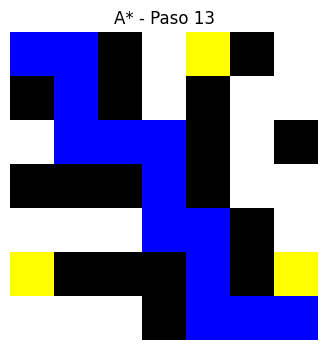

In [28]:

import time
from IPython.display import clear_output

def mostrar_pasos(mapa, camino, titulo):
    cmap = ListedColormap(['white', 'black', 'red', 'green', 'yellow', 'blue'])
    for paso, (x, y) in enumerate(camino):
        colores = np.full(mapa.shape, 0)
        for i in range(7):
            for j in range(7):
                if mapa[i, j] == '#':
                    colores[i, j] = 1
                elif mapa[i, j] == 'A':
                    colores[i, j] = 2
                elif mapa[i, j] == 'S':
                    colores[i, j] = 3
                elif mapa[i, j] == 'F':
                    colores[i, j] = 4
        for k in range(paso + 1):
            xi, yi = camino[k]
            colores[xi, yi] = 5
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        plt.imshow(colores, cmap=cmap)
        plt.axis('off')
        plt.title(f'{titulo} - Paso {paso + 1}')
        plt.show()
        time.sleep(0.8)

# Visualizar paso a paso para DFS y A*
mostrar_pasos(mapa, camino_dfs_nodos, "DFS")
mostrar_pasos(mapa, camino_astar, "A*")


## 👾 Simulación con imágenes: El fantasma persigue a Pac-Man

In [29]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# Cargar imágenes
img_pacman = mpimg.imread('/content/pacman_resized.png')
img_fantasma = mpimg.imread('/content/fantasma_resized.png')

fantasma_inicio = tuple(np.argwhere(mapa == 'F')[0])

def moverse_fantasma(fantasma_pos, pacman_pos):
    vecinos = list(G.neighbors(fantasma_pos))
    mejor = min(vecinos, key=lambda x: heuristic(x, pacman_pos))
    return mejor

def simulacion_con_imagenes(mapa, camino_pacman):
    pacman_pos = camino_pacman[0]
    fantasma_pos = fantasma_inicio

    for paso in range(len(camino_pacman)):
        pacman_pos = camino_pacman[paso]
        if paso > 0:
            fantasma_pos = moverse_fantasma(fantasma_pos, pacman_pos)

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 7)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')

        for i in range(7):
            for j in range(7):
                if mapa[i, j] == '#':
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='black'))
                elif mapa[i, j] == 'S':
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='green'))
                else:
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='white', edgecolor='lightgray'))

        # Mostrar Pac-Man
        ax.imshow(img_pacman, extent=(pacman_pos[1], pacman_pos[1]+1, 6 - pacman_pos[0], 6 - pacman_pos[0]+1), zorder=2)

        # Mostrar Fantasma
        ax.imshow(img_fantasma, extent=(fantasma_pos[1], fantasma_pos[1]+1, 6 - fantasma_pos[0], 6 - fantasma_pos[0]+1), zorder=2)

        ax.set_title(f"Paso {paso + 1}: Pac-Man vs Fantasma")
        plt.show()
        time.sleep(0.8)
        clear_output(wait=True)

        if pacman_pos == fantasma_pos:
            print("❌ ¡El fantasma atrapó a Pac-Man!")
            break
    else:
        print("✅ Pac-Man llegó a la meta sin ser atrapado.")

# Ejecutar la simulación actualizada
simulacion_con_imagenes(mapa, camino_astar)

❌ ¡El fantasma atrapó a Pac-Man!


In [30]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# Cargar imágenes
img_pacman = mpimg.imread('/content/pacman_resized.png')
img_fantasma = mpimg.imread('/content/fantasma_resized.png')

# Buscar todas las posiciones de fantasmas
fantasmas_inicio = [tuple(pos) for pos in np.argwhere(mapa == 'F')]

def moverse_fantasma(f_pos, pacman_pos):
    vecinos = list(G.neighbors(f_pos))
    if vecinos:
        return min(vecinos, key=lambda x: heuristic(x, pacman_pos))
    return f_pos

def simulacion_multi_fantasmas(mapa, camino_pacman):
    pacman_pos = camino_pacman[0]
    fantasmas_pos = fantasmas_inicio.copy()

    for paso in range(len(camino_pacman)):
        pacman_pos = camino_pacman[paso]
        if paso > 0:
            fantasmas_pos = [moverse_fantasma(f, pacman_pos) for f in fantasmas_pos]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 7)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')

        for i in range(7):
            for j in range(7):
                if mapa[i, j] == '#':
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='black'))
                elif mapa[i, j] == 'S':
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='green'))
                else:
                    ax.add_patch(plt.Rectangle((j, 6 - i), 1, 1, color='white', edgecolor='lightgray'))

        # Mostrar Pac-Man
        ax.imshow(img_pacman, extent=(pacman_pos[1], pacman_pos[1]+1, 6 - pacman_pos[0], 6 - pacman_pos[0]+1), zorder=2)

        # Mostrar Fantasmas
        for f in fantasmas_pos:
            ax.imshow(img_fantasma, extent=(f[1], f[1]+1, 6 - f[0], 6 - f[0]+1), zorder=2)

        ax.set_title(f"Paso {paso + 1}: Pac-Man vs Múltiples Fantasmas")
        plt.show()
        time.sleep(0.8)
        clear_output(wait=True)

        if pacman_pos in fantasmas_pos:
            print("❌ ¡Un fantasma atrapó a Pac-Man!")
            break
    else:
        print("✅ Pac-Man llegó a la meta sin ser atrapado por ningún fantasma.")

# Ejecutar la simulación con múltiples fantasmas
simulacion_multi_fantasmas(mapa, camino_astar)

❌ ¡Un fantasma atrapó a Pac-Man!



## ✅ Conclusiones

- **DFS** encuentra una solución pero no necesariamente la más corta. Puede ser útil en árboles muy profundos, pero propenso a ciclos si no se controla.
- **A\*** encuentra el camino más corto si se usa una heurística admisible (como la distancia de Manhattan).
- En este escenario, A* es más eficiente en calidad del resultado, aunque requiere más recursos computacionales en mapas más grandes.
